# BUS32100, Week 5
# In-class exercise: Regression and feature engineering

This exercise will be a guided tour of *feature engineering* in Python. Remember, feature engineering is the process of taking existing data and, through calculations, creating more features. The idea is that new features may be more useful or telling than the existing data on its own. For example, if we have loan data, calculating an LTV ([loan-to-value](https://www.investopedia.com/terms/l/loantovalue.asp)) ratio for a mortgage application can tell us more about the risk of making a loan than knowing only the loan amount requested or the value of the underlying home. 

The data will be the popular [Ames home pricing dataset](https://www.kaggle.com/prevek18/ames-housing-dataset), which includes data on nearly 3,000 properties sold in Ames, Iowa. There are several versions of this dataset floating around, so for consistency please use the version posted on Canvas. 

------------------------------------------------------------------------------

### Optional review below on objects/methods is based on some student questions I've gotten. Feel free to skip if it makes sense to you!

### Review of objects and methods on objects

Remember, computer programs are just a combination of data and operations that we do on that data. For exmaple, the data could be a dataset on home prices, and the operation that we do on it is to run a regression. But it could be even simpler. The operation could be something like taking the average home price in our dataset. 

To make our programming life easier, we use `variables`. A `variable` is simply a name for data stored in our computer's memory. Instead of referring to our data, e.g. our home price dataset, by the memory location for it, we can just call it by a variable name. Example: 

```python
x = 5 # x is a variable, its value is 5
```

**Object oriented programming (OOP)** is one possible paradigm of programming and the one used in Python. In OOP, we refer to our variables as objects. Think of an object as a specialized type of box: there are many types of boxes you can pick, and you'll choose the one that can hold the type of information you need at that moment. 

Types of boxes, aka objects, could be e.g. `cat`, `dog`, and `rabbit`. A `cat` can do different things from a `dog`.

Data types, e.g., int, str and float in Python are types of objects! 

We've already used objects! Remember how we created a linear regression? The first step was this: 

```python
lin_reg = LinearRegression()
```

^ This line of codes created an `object` of type `LinearRegression()`. So, it is a box that is of type linear regression and so can do things that a linear regression can do. The `variable` name of that object is `lin_reg`.

We can **do operations on objects**. For this, we use the **dot operator** to **call a method**. For example: 

`cat.meow()`

If we had a `variable` of type `cat`, we could call the `method` `meow()` on it using the `.` operator. Calling a method returns a value. In this case, perhaps the method `meow()` prints "meow" to the screen. 

To put this in an example we've already seen: 

```python
df.describe()
```

In this case, `df` is the variable name and it holds an object of type Pandas DataFrame. We use the dot operator `.` to call the method `.describe()` on it. The method describe returns to us the seven number summary of all columns that hold numeric data. 

### Changing the contents of a variable

We assign a value to a variable like this: 

`x = 5`

But we can overwrite the value in `x` at any time! We can even change the data type in `x` simply by assigning data of a different type to it. For example: 

```python
x = 5
x = "hello" # now x has the value "hello" and 5 is gone forever! 
```

**Be careful, though! Python will NOT warn you when you ovewrite your variable, even if you change its data type!** This is because Python was intentionally designed to be as flexible as possible. So it just assumes you _meant_ to do that. This means you need to be super careful about your variable names (this is why I suggest using descriptive names, so it's harder to accidentally overwrite your data). 

-----------------------------

## SKIP TO HERE if you don't want to go through the optional review!

-----------------------------

### 1. Imports 

We'll be using `Pandas` to read in the data and to do the calculations on it. We'll be using `Seaborn` for plotting. And we'll be using `sklearn` for our linear regression model. 

In [1]:
# Imports - run this cell 

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

### 2. Load the data

Load the dataset "ames_housing.csv" 

In [6]:
# <to-do> load dataset using Pandas

df_ames = pd.read_csv('/Users/douglasmacintosh/Downloads/ames_housing(1).csv')

### 3. Examine the dataset

We have our dataset in Pandas, but we know nothing about it! Use Pandas functions like `.info()` and `.describe()` to start getting a feel for the data. Then use `.head()` to look at the first few rows of the dataset. 

**Using a markdown cell**, please give a few sentences of what you now know about the dataset: 
* How many columns does it have? 
* Which columns, if any, have null values? 

In [7]:
# <to-do> examine the dataset using info, describe and head

df_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
df_ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
df_ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 4. Remove outliers and check how many rows are left

The original dataset authors recommend removing any properties with square footage above 4,000 sq ft as outliers. Use Pandas to create a new dataset that does not include these homes. 

* Use the feature `Gr Liv Area` and remove rows where that feature is > 4,000
* Check how many rows of data we have left by using `df.shape` -- this attribute returns (# rows, # columns)

In [10]:
# <to-do> Use Pandas subsetting to remove homes with sq ft > 4000 and assign output to new dataframe 

mask = (df_ames['Gr Liv Area'] > 4000)

df_ames_small_homes = df_ames[mask]

In [11]:
# <to-do> Print out the shape of the dataset for the original dataset and the new dataset with sq ft > 4000 removed 

print(df_ames.shape)
print(df_ames_small_homes.shape)

(2930, 82)
(5, 82)


-----------------------------------------------

### Review of the Pandas `loc` function

Let's get (re)introduced to the `Pandas` `loc` function. **Note:** I prefer to use the masking method to get subsets, but other classes that use Python/Pandas may require you to know `loc`, so let's learn it.

The [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function is used to slice (aka select) rows from a DataFrame using columns and rows. `loc` stands for **loc**ation subsetting. 

It works like this: `df.loc[ rows, columns ]` 

**Using `:` to select a range**

Note that, in `Python` and many other programming languages, you use the colon `:` when taking slices to set the start and end points of the range. For example, `3:7` means the range from 3 to 7. Depending on the language or the library, the second number may or may not be inclusive! In general, the second number is *not inclusive* in `Python` but it *is inclusive* in `Pandas`'s `loc` function. If it's not inclusive, then `3:7` means the list `[3,4,5,6]`. We will see how to use this concept of a range to select rows and columns from a DataFrame. 

**Choosing all of something with an empty colon `:`**

We know that we can select a range with `start:stop`. But sometimes you want to start at the beginning and stop at the end. In that case, using an empty `:` means "give me back all of the values." We use it by putting a `:` in a place that requires a range. 

**Putting it together: choosing all rows and some columns with `loc`**

Say we want all rows and only columns A, B and G from a dataframe. It would look something like this (remember, the empty `:` means "give me ALL rows"): 

`new_df = old_df.loc[ : , ['column_A', 'column_B', 'column_G'] ]`

------------------------------------------------

### 5. Use `loc` to select only a few columns for modeling

Let's use `loc` now on our Ames housing dataset to select all rows and only some columns for modeling. Some columns have a lot of missing values (we saw this using `.info()` above), so let's pick a few columns that have all their values and are easy to work with. 

Keep only the columns `['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Cars','SalePrice']`

It will look something like this. Refer to the last part of the aside above to see how to choose ALL rows: 

`new_df = old_df [ rows, [list,of,columns] ]`

In [12]:
# <to-do> use Pandas loc to create a new DataFrame with only a few columns (listed above) 
col = ['Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Cars','SalePrice']

loc_df = df_ames.loc[ : , col]


### 6. Fill missing values with 0

Let's check whether any of the columns in our smaller dataset have NULL values. Hint: It looks like `Garage Cars` does have a NULL value. When we find a NULL in our data, we have two options: we could drop a row that has any NULLs, or we could fill in the NULL with something else. 

There are then several options for filling in:take an average of that feature for all observations, use a zero, use a really small number, use a really big number. Which option we choose will depend on our use case. Here, it might make sense to replace any NULLs in `Garage Cars` with a 0. 

To fill in a NULL: 

`df = df.fillna( value = {'columns_name' : fill_value } ) `

So, e.g., `df = df.fillna( value = {'Lot Area' : 99999 } ) `

Use ^ to fill in NULL values in `Garage Cars` with `0`.

In [13]:
# <to-do> fill in missing NA in Garage Cars with zero 
loc_df = loc_df.fillna( value = {'Garage Cars' :  0 })


In [14]:
# <to-do> use .info() to check that our null has been filled in 

loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
 10  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB


### 7. More EDA with a pairplot

Plot a pairplot using `Seaborn` to see our data and what it looks like. Remember, the code looks like this: 

`sns.pairplot(df)`

This may take a 30 seconds to run. 

After the pairplot runs, use a markdown cell and **write a few sentences about the relationships** you see in the data. Since we're using a linear regression model, we'd like to see linear relationships between our features. So look for scatter plots in the larger pairplot that show a linear relationship between two features. Do you see any? 

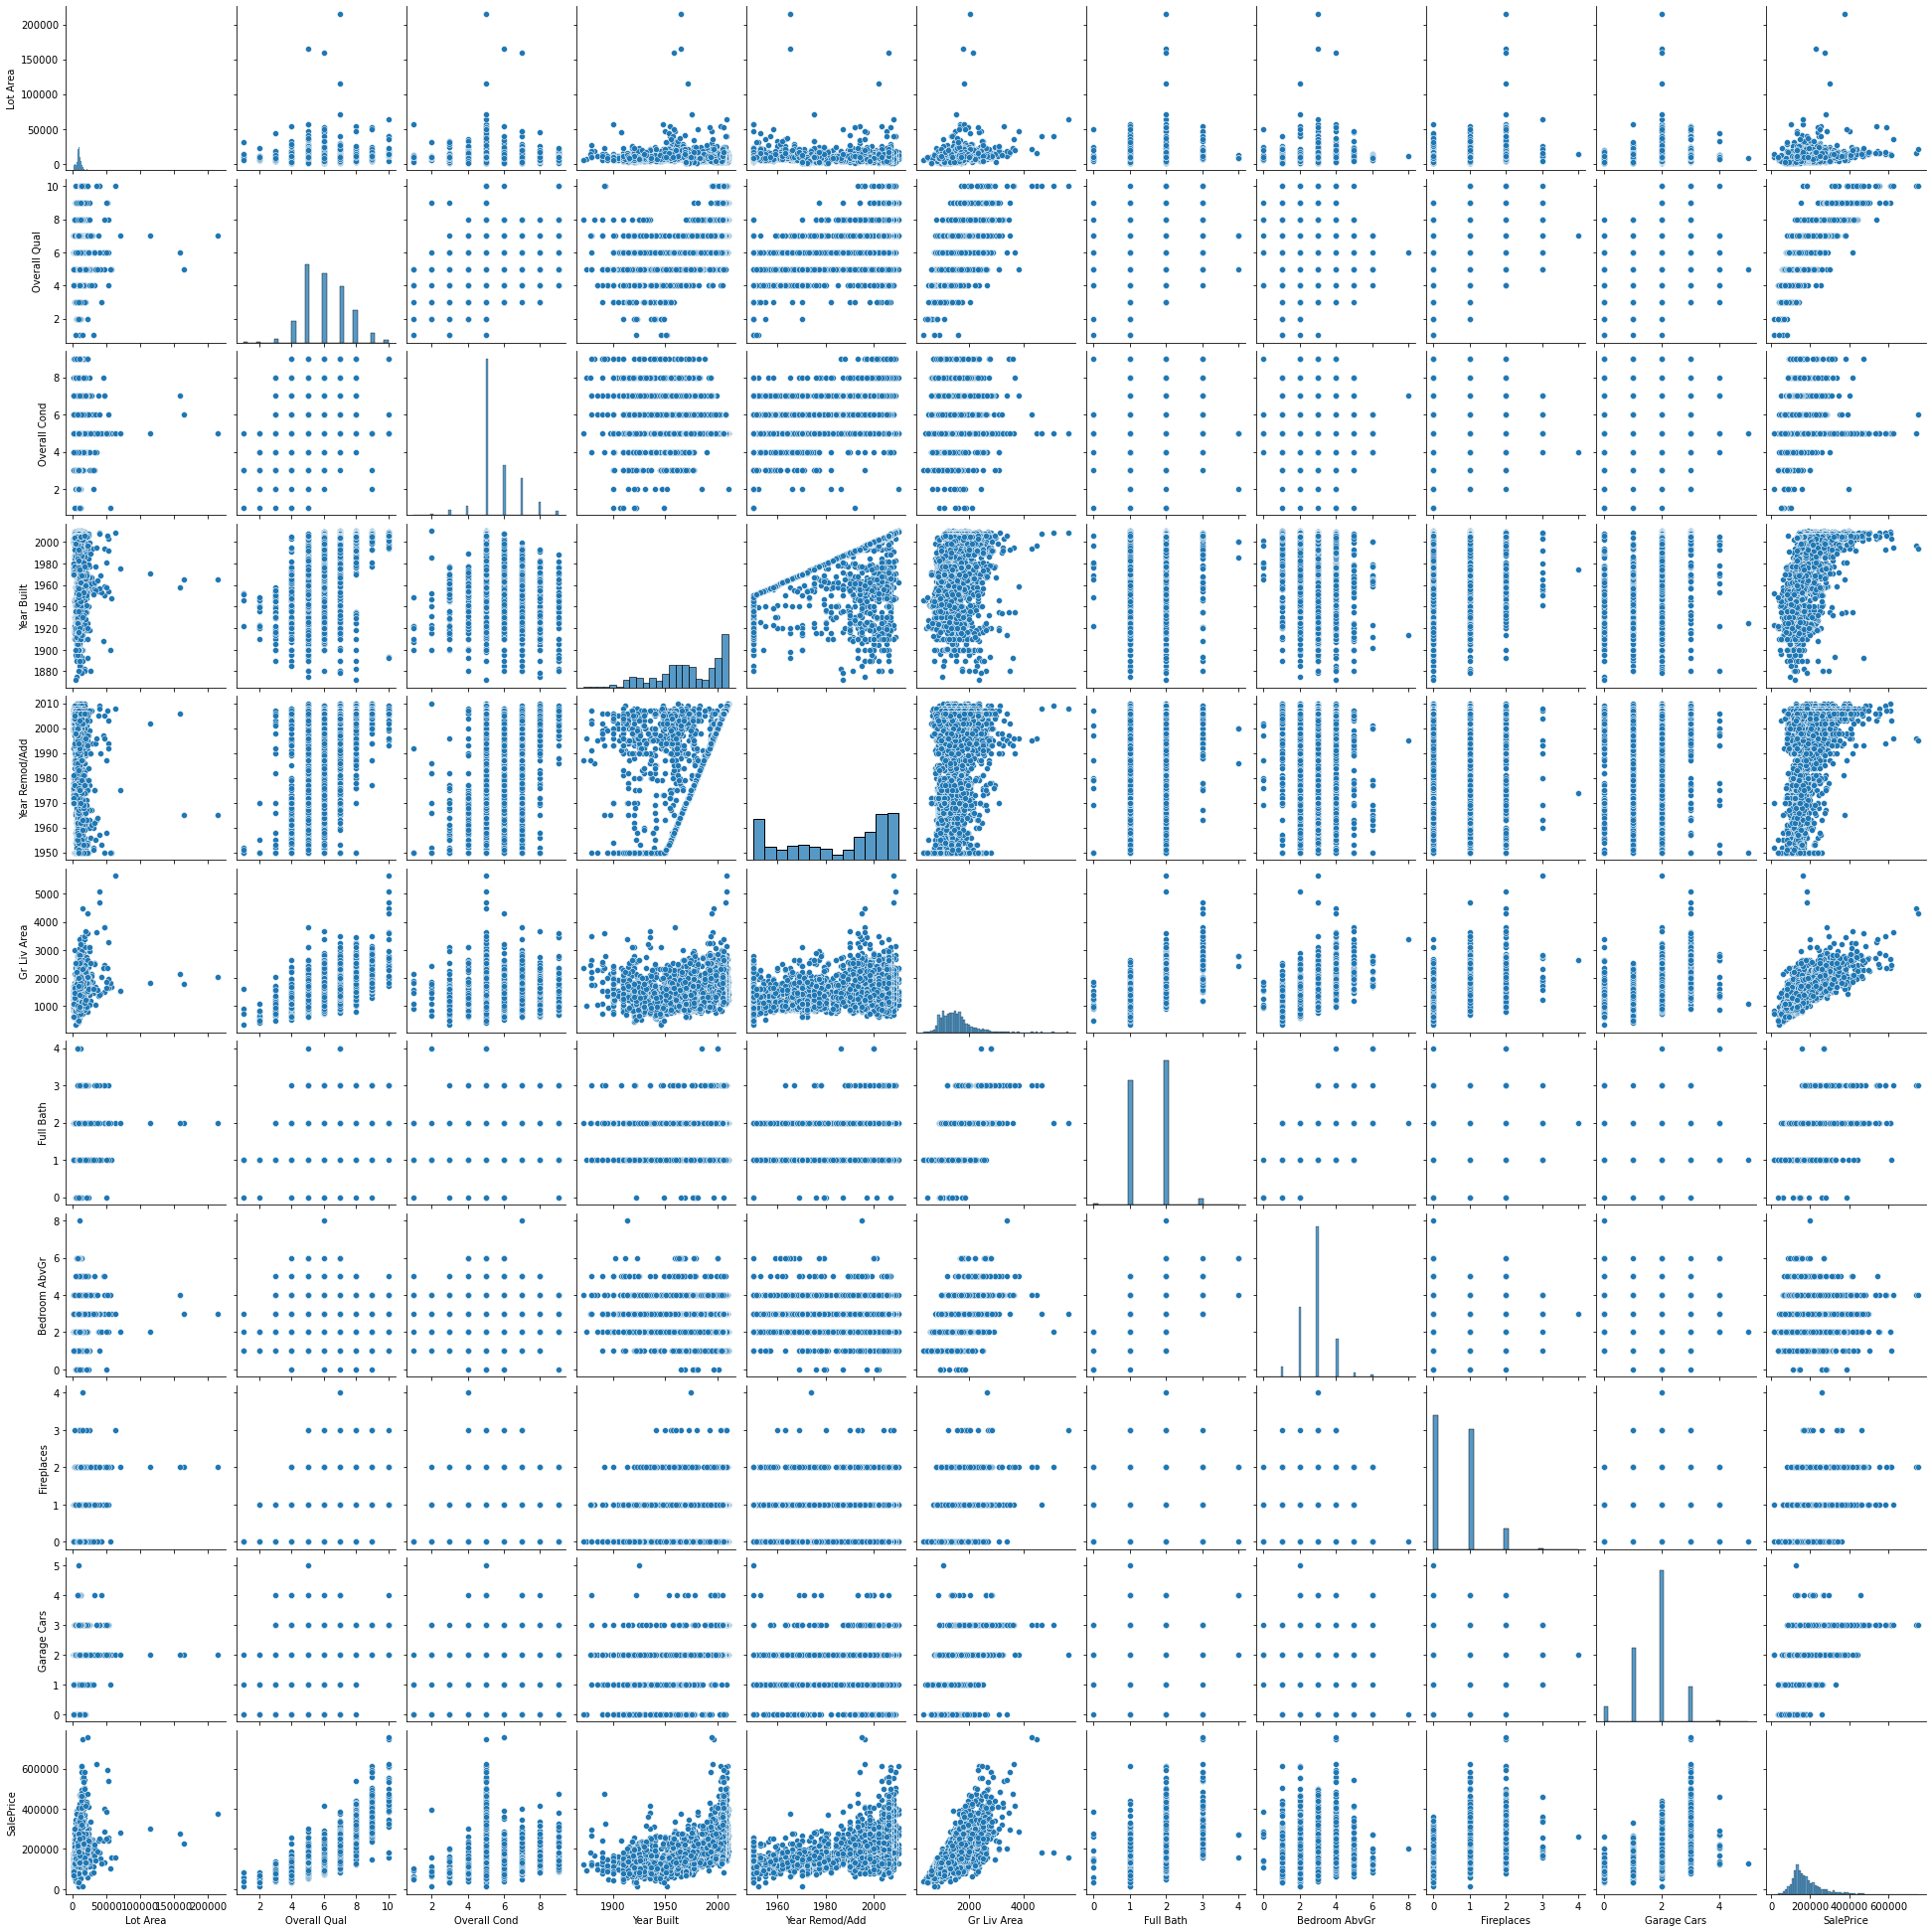

In [15]:
# <to-do> sns pairplot 
# <to-do> write a few sentences about any linear relationships between two features 

sns.pairplot(loc_df)

### 8. Write a function to run a linear regression and report metrics

We'll be using a linear regression on our data. We'll then do some feature engineering and rerun the model. 

The following function takes in our (X,y) data and runs a linear regression on it, then prints out some metrics. Remember, a function is a way to encapsulate code that we'd like to run over and over on different inputs to save us the hassle of having to copy/paste it. 

**I've built the foundation of the function, but YOU still have to fill parts in! Then run this cell so the function is available to use in this notebook.**

In [23]:
from sklearn.linear_model import LinearRegression

def run_linear_regression(X, y):
    '''
    Fit a linear regression model on input data
    Print the R-squared score for the model 
    '''
    
    # Fit linear regression on X, y inputs
    # revisit the linear regression notebook from lecture if you don't remember
    lr_model = LinearRegression()# todo: create regression object
    lr_model.fit(X, y)#(#,#)  # todo: fill in the # with the method for fitting a function and the parameters for the fit
    
    # Calculate the r-squared metric for the regression
    score = lr_model.score(X, y)
    #(X, y) # todo: what's the method to get the SCORE back for a regression? read the sklearn documentation if needed
    
    # Print output so we can track our model
    # don't change the below, it's just printing code
    print('\nR-squared = ', score)
    print('Feature coefficients (aka slopes): \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

### Aside on R-squared

Each time we run our linear regression, we'll report a metric called r-squared (R^2). R^2 is measure from 0 - 1. Values closer to 0 indicate our model isn't working very well. Values closer to 1 indicate our model is capturing patterns in the data. We're going to be reporting R^2, doing some feature engineering, then looking at R^2 again to see if our model improved (aka if we increased R^2). 

It's calculated as $R^2 = 1 - \frac{ \text{area of blue squares} }{\text{area of red squares}}$

People will often say that the blue area represents what the model could _not_ explain, and the red area is what the model has to explain (variance from the median value of $y$, or the output variable).

![explanation of r-squared](./img/rsquared.png)

### 9. Create an (X,y) modeling dataset and run a baseline regression

Our data is currently in one big DataFrame. Remember from lecture 1 that our `Python` package for linear regression, called `sklearn`, needs our input to be divided into an X matrix of all our data *except the output* and a y vector of *only the output*. Create your X and y modeling datasets. Note that it's customary to write a capital X for the matrix and a lowercase y for the vector. 

**1. Create an X, y modeling dataset. Our output feature is `Sale Price`.**

Hint: use the `.loc` function we learned about to select all rows and all columns *except* for `Sale Price`. 

`X = df.loc[ rows, columns] `

`y = df['SalePrice']`

**2. Run a baseline regression using run_linear_regression(X, y) from above**

In a markdown cell, write a sentence or two about our baseline model. What is its r-squared?

In [40]:
# <to-do> 1. create X and y inputs 
#X_train, X_test, y_train, y_test = train_test_split( loc_df.iloc[:, 0:9], df_ames.iloc[:, 10], 
#                                                    test_size = 0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split( loc_df.drop('SalePrice',axis=1), loc_df['SalePrice'], 
                                                    test_size = 0.2, random_state=42)

#X1 = loc_df.loc[:,0:9]
#y1 = loc_df.loc[:,10]

#dataframe.iloc[:, startcolumn : endcolumn]

#df_ames.iloc[:, 0:80], df_ames.iloc[:, 81]
#df_ames.iloc[:, 0:80], df_ames.iloc[:, 81]

In [41]:
y_train

381     152000
834     185000
1898    101800
678      90000
700      94550
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: SalePrice, Length: 2344, dtype: int64

In [42]:
# <to-do> 2. use our run_linear_regression(X,y) function from above to run a baseline regression

run_linear_regression(X_train, y_train)



R-squared =  0.7906913109161489
Feature coefficients (aka slopes): 

Lot Area : 0.90
Overall Qual : 20086.17
Overall Cond : 4640.91
Year Built : 480.11
Year Remod/Add : 156.09
Gr Liv Area : 63.45
Full Bath : -5765.29
Bedroom AbvGr : -8403.46
Fireplaces : 7757.01
Garage Cars : 12129.30


### 10. Feature engineering: polynomial terms 

Remember that, for linear regression, we want our pairplots to show a linear relationship between each feature and our outcome variable (`Sale price`). Go back to the pairplot you created above. 

Notice that, for some pairs of output and feature, the relationship looks a bit more parabolic than linear. Here's a screenshot from my pairplot. Notice especially the relationship beween `Sale Price` and `Overall Qual` (second plot) and the relationship between `Sale Price` and `Gr Liv Area` (last plot).

Ok, ok, it's hard to tell whether the relationship is truly non-linear. But things in data analytics are usually pretty ambiguous, so get used to that. 

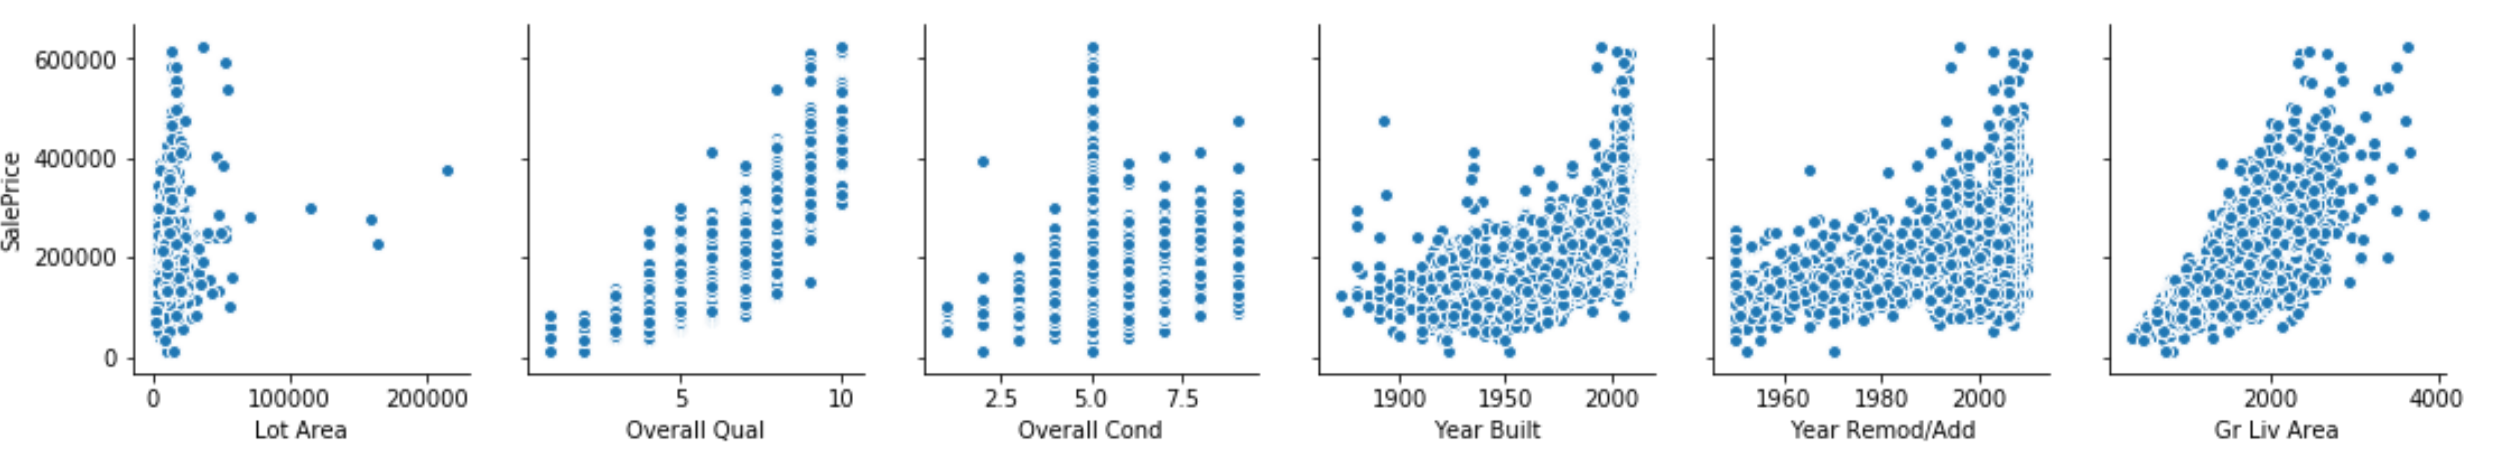

**Using feature engineering to make the relationship linear** 

We want a linear relationship between our output and feature. In the above two examples, we have something more approximating a parabola. To "fix" that issue, we can square our input! This would make the relationship linear! Then we use the squared input in our model. 

**To dos: **

1. Create two new variables that are input ^ 2. 

We noticed that `Overall Qual` and `Gr Liv Area` would benefit from being transformed to create a linear relationship with the output variable. To do this, create two new variables, `qual_squared` and `liv_area_squared`, that take those inputs and square them. The power operator in Python is `**`. 

`X_new['Overall Qual Squared'] = X['Overall Qual'] ** 2`

2. Then run another regression with the new dataset. What's the new r-squared? 

For now, don't worry about removing the old inputs `Overall Qual` and `Gr Liv Area` from your dataset. In the real world, you would want to remove them before running the new model, though. 

Write a few sentences about the new regression. Did our fit (as measured by r-squared) improve? 

In [44]:
# <to-do> square overall qual and gr liv area


X_train['Overall Qual Squared'] = X_train['Overall Qual'] ** 2
X_test['Overall Qual Squared'] = X_test['Overall Qual'] ** 2

X_train['Gr Liv Area Squared'] = X_train['Gr Liv Area'] ** 2
X_test['Gr Liv Area Squared'] = X_test['Gr Liv Area'] ** 2


In [45]:
# <to-do> run regression with new dataset 
run_linear_regression(X_train, y_train)



R-squared =  0.8297416789807048
Feature coefficients (aka slopes): 

Lot Area : 0.87
Overall Qual : -54865.27
Overall Cond : 9235.60
Year Built : 597.29
Year Remod/Add : 79.57
Gr Liv Area : 88.44
Full Bath : -5097.53
Bedroom AbvGr : -3696.46
Fireplaces : 9305.97
Garage Cars : 9983.86
Overall Qual Squared : 6087.55
Gr Liv Area Squared : -0.01


### 11. Feature engineering: interaction terms 

Another approach to feature engineering is to calculate **interaction terms.** These are terms where multiple features have an impact on each other, and putting them together gives us more information than each on their own. For example, we might be interested in the quality per square foot for a home because a small, higher quality home will cost more than a bigger but low quality home. To get at this effect, we could create a new term that takes quality and divides it by square footage.

Some ways to create interaction terms: 
* Divide features by each other
* Multiply features by each other 

**Create several interaction terms!** Here are some ideas to get you started: 
* `Overall Qual` / `Gr Liv Area` 
* `Gr Liv Area` / `Lot Area`
* `Overall Cond` x `Year Built` (is there a premium for higher condition homes built more recently?) 

After you create the new terms, run another regression. 

In [47]:
# <to-do> create some interaction terms

# multiplicative interaction

X_train['Overall Cond x Year Built'] = X_train['Overall Cond'] * X_train['Year Built']
X_test['Overall Cond x Year Built'] = X_test['Overall Cond'] * X_test['Year Built']

# division interaction

X_train['Overall Qual / Gr Liv Area '] = X_train['Overall Qual'] / X_train['Gr Liv Area']
X_test['Overall Qual / Gr Liv Area '] = X_test['Overall Qual'] / X_test['Gr Liv Area']

X_train['Gr Liv Area / Lot Area '] = X_train['Gr Liv Area'] / X_train['Lot Area']
X_test['Gr Liv Area / Lot Area '] = X_test['Gr Liv Area'] / X_test['Lot Area']


In [48]:
# <to-do> re-run the regression and note the r-squared -- did you make the model better or worse? 

run_linear_regression(X_train, y_train)


R-squared =  0.8386528677915559
Feature coefficients (aka slopes): 

Lot Area : 0.47
Overall Qual : -66478.28
Overall Cond : 25747.03
Year Built : 682.32
Year Remod/Add : 76.73
Gr Liv Area : 149.83
Full Bath : -4764.11
Bedroom AbvGr : -5121.76
Fireplaces : 8775.40
Garage Cars : 8122.72
Overall Qual Squared : 6450.45
Gr Liv Area Squared : -0.02
Overall Cond x Year Built : -8.55
Overall Qual / Gr Liv Area  : 10519697.94
Gr Liv Area / Lot Area  : -68672.05


### 12. Feature engineering: dummy variables 

A dummy variable is a 0 or 1 value that indicates whether a characteristic is true or false for a given observation. For example, if each row is a home, then a column or 0/1's could indicate whether the home is new construction. We are not limited to a single column to capture our characteristic, though. We could have, for example, three columns that represent the color of our home: blue, white, and brown. Then for each row, only one of the three columns would be a 1 and the other two would be a 0. 

`home_id    blue     brown   white
123          0         0        1
456          1         0        0 `

Using dummy variables allows us to include **categorial data** in our regression. Remember, categorical data is something like color or grade-level, anything that can be captured by a relatively small number of mutually exclusive categories. 

**Explore the value_counts() of some categorical variables**

Before we start making dummy variables, let's find some suitable features. To do this, we can use `.value_counts()` on a feature we're interested in to see if there's enough variation in the feature to make sense to use it as a dummy. There's no strict rule for how many variety there needs to be, but, if 99% of all observations falls into a single category, then it may not be a good candidate. 

Pick some categorical variables from the original dataset and use `value_counts()` to see their variety! Remember, though, you'll want to use features that have no nulls (or you'll have to figure out how to drop rows with null values). 

E.g. 

`df['Sale Condition'].value_counts()`

In [49]:
# <to-do> pick some categorical variables from the original dataset 
# and use value_counts() to see how varied they are 

df_ames['Sale Condition'].value_counts()

Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

In [50]:
df_ames['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64

In [51]:
df_ames['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

### 13. Feature engineering: add dummy variables to model 

Above we saw what a dummy variable is and we found some features that might make sense to add to our model as dummy variables. Let's see how to do that in `Pandas.` 

We'll be using the `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)).

It'll look like this, where column_A and column_G are the ones we'd like to create dummies for: 

`X_dummy = pd.get_dummies(data = X, columns=['column_A', 'column_G'] )`

**HINT**: Remember that your modeling dataset used only a subset of your full data! You'll want to add the column you'd like to dummify to your modeling dataset first, and then use `get_dummies` on that slightly larger dataset. Don't use the full dataset, you won't be able to run a regression on it because it'll have all kinds of string columns. 

`modeling_df['new_column'] = full_df['column_to_add']` 

^ This will work if you haven't removed any rows or changed the order of the rows. 

**Look at output from `get_dummies`**:

To see what the output from `get_dummies` looks like, try running this. It will not change any existing dataset. 

`pd.get_dummies(data = original_df['House Style'], columns=['House Style']).head(5)`

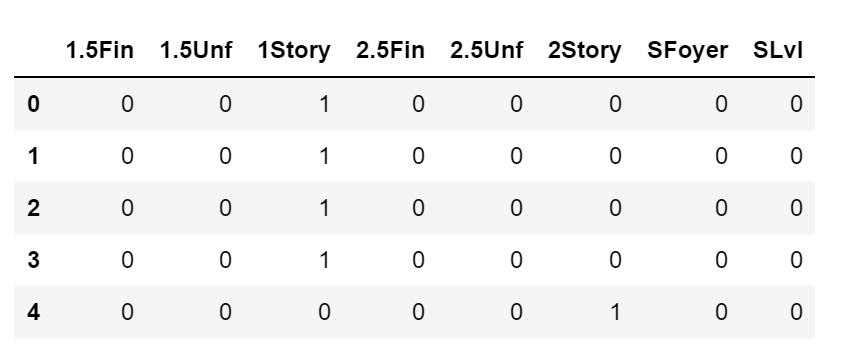

In [ ]:
# <to-do> add dummy variables for one of the categorical features you explored above 



In [ ]:
# <to-do> run a new linear regression with the new dummified dataset! 



### 14. Feature engineering: replace categories with low counts with "other"

Sometimes there's a feature we'd like to use as a dummy, but it has a long tail. That is, it has a few categories with a lot of observations, but it also has many, many categories with only a small number of observations. We can deal with this by replacing the many categories with only a few observations with an "other" category. 

One example in our dataset might be `'Neighborhood'`. Run `value_counts()` on `Neighborhood` to see.

In [ ]:
# <to-do> value counts on neighbohood feature



To condense the neighborhoods with fewer than 10 observations into an "other" category, we can do this: 

```Python
neighbs_count = df['Neighborhood'].value_counts()
low_count_neighbs =  neighbs_count[neighbs_count <= 10]

list_low_count_neighbs = list(low_count_neighbs.index)

df['Neighborhood'] = df['Neighborhood'].replace(list_low_count_neighbs, "Other neighborhood")
```

In [ ]:
# <to-do> add Neighborhood to your modeling dataset


In [ ]:
# <to-do> replace neighborhoods with low observation count with "other neighborhood"
# use the code above as a guide 



In [ ]:
# <to-do> re-run the regression and see if it improved 



### 15. Does feature engineering help? 

In a markdown cell, write out a few sentences about what you learned from this exercise. Did your r-squared go up or down as you added engineered features? What other ways to engineer features might you add to this dataset? 

`<to-do>` write conclusion 